<a href="https://colab.research.google.com/github/fabiodemo/Deep-Learning-CV-CNN-TL/blob/main/cnn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks - Implementation

Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`tf.keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`tf.keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`tf.keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.




### 1. Preparing the input data

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
mnist.load_data?

In [12]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

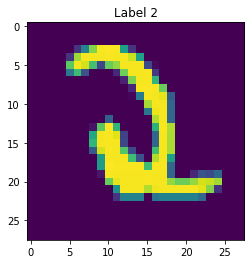

In [17]:
import matplotlib.pyplot as plt

i=400
plt.imshow(X_train[i])
plt.title("Label " + str(y_train[i]))
plt.show()

Now, let's normalize the data using standardization:

In [18]:
X_train/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(400, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

epochs são os números de vezes que a rede neural vai ler por completo todos os dados

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 2.7638 - accuracy: 0.9007 - val_loss: 0.3694 - val_accuracy: 0.9306
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3310 - accuracy: 0.9349 - val_loss: 0.4029 - val_accuracy: 0.9213
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.9398 - val_loss: 0.3427 - val_accuracy: 0.9366


In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.9408 - val_loss: 0.3302 - val_accuracy: 0.9408
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2469 - accuracy: 0.9487 - val_loss: 0.2946 - val_accuracy: 0.9445
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2214 - accuracy: 0.9538 - val_loss: 0.2885 - val_accuracy: 0.9503
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2140 - accuracy: 0.9557 - val_loss: 0.3038 - val_accuracy: 0.9519
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2173 - accuracy: 0.9577 - val_loss: 0.3056 - val_accuracy: 0.9498
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9589 - val_loss: 0.3202 - val_accuracy: 0.9507


In [24]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1878 - accuracy: 0.9603 - val_loss: 0.3522 - val_accuracy: 0.9520
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1797 - accuracy: 0.9646 - val_loss: 0.3455 - val_accuracy: 0.9506
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1804 - accuracy: 0.9636 - val_loss: 0.3615 - val_accuracy: 0.9572
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9676 - val_loss: 0.4298 - val_accuracy: 0.9537
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1743 - accuracy: 0.9670 - val_loss: 0.3839 - val_accuracy: 0.9532
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1747 - accuracy: 0.9685 - val_loss: 0.4355 - val_accuracy: 0.9521
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1617 - accuracy: 0.9701 - val_loss: 0.4881 - val_accuracy:

In [29]:
import pandas as pd
# hist.history
# pd.DataFrame(hist.history)
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.187763,0.960333,0.352235,0.9520
1,0.179689,0.964567,0.345494,0.9506
2,0.180362,0.963600,0.361473,0.9572
3,0.173570,0.967633,0.429780,0.9537
4,0.174304,0.967017,0.383855,0.9532
5,0.174669,0.968533,0.435484,0.9521
6,0.161669,0.970133,0.488105,0.9480
7,0.159294,0.970917,0.476539,0.9560
8,0.161031,0.970633,0.440735,0.9548
9,0.153194,0.971867,0.579399,0.9518


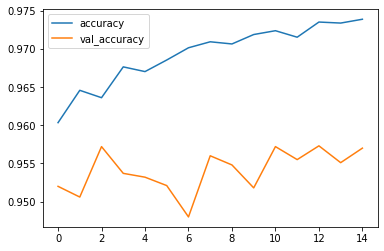

In [32]:
df[['accuracy', 'val_accuracy']].plot()

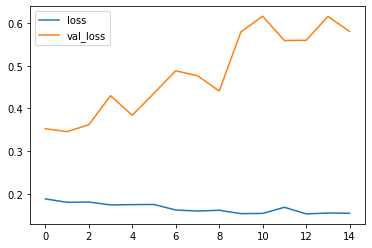

In [33]:
df[['loss', 'val_loss']].plot()

##### Os dados foram treinados sem normalizar os dados, então para verificar a diferença utilizaremos os dataset com dados normalizados

In [35]:
x_mean = X_train.mean()
x_std = X_train.std()
X_train_norm = (X_train - x_mean)/ x_std

In [36]:
X_test_norm = (X_test-x_mean)/x_std

In [37]:
hist = model.fit(X_train_norm, 
                 y_train, 
                 validation_data=(X_test_norm, y_test), 
                 epochs=15
                 )

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.0955 - val_accuracy: 0.9719
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0887 - val_accuracy: 0.9740
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0791 - val_accuracy: 0.9791
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0782 - val_accuracy: 0.9795
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0781 - val_accuracy: 0.9817
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0852 - val_accuracy:

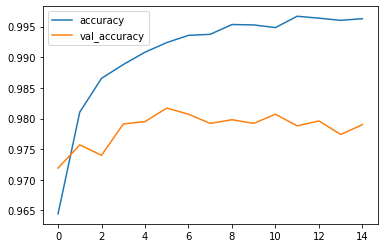

In [39]:
df = pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

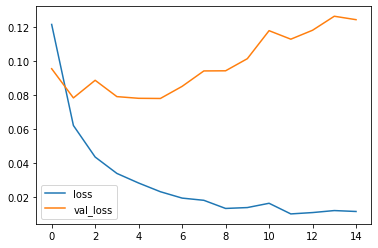

In [40]:
df[['loss', 'val_loss']].plot()

### 3. Extending to CNNs


Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units


#### 3.1 One Conv-Layer


#### 3.2 One Conv-Layer + Maxpooling

#### 3.3 Two Conv-Layer + Maxpooling

And now, let's finish the architecture:

### 4. Visualizing predictions

Finally, let's visualize some predictions: